## Import Libraries

In [1]:
import re
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image, display
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

## Import Dataset

In [2]:
df = pd.read_csv('../Dataset/Golap_Dataset_Final.csv')

df.head()

,Laptop_Index,Link_References,Laptop_Name,User_Rating,Price_in_IDR,Laptop_Type,Dedicated_GPU_in_GB,Processor_Brand,Storage_Type,RAM_in_GB,...,Laptop_Company,Storage_Capacity,Processor,CPU_Rank,Battery_Lifetime_in_Hrs,GPU,GPU_Benchmark_Score,RAM_Type_Tokenized,GPU_Processor_Tokenized,Image_Link
0,1,https://www.flipkart.com/acer-aspire-3-core-i3...,acer aspire 3 core i3 11th gen_type(1),4.2,6587512,2,0,1,1,4,...,8,256,intel core i3 11th gen,362,4.5,intel uhd,5.05,4,7,https://rukminim2.flixcart.com/image/416/416/k...
1,2,https://www.flipkart.com/acer-aspire-3-core-i3...,acer aspire 3 core i3 11th gen_type(2),NaN,7338698,2,0,1,1,8,...,8,512,intel core i3 11th gen,362,4.5,intel uhd,5.05,4,7,https://rukminim2.flixcart.com/image/416/416/l...
2,3,https://www.flipkart.com/acer-aspire-3-core-i5...,acer aspire 3 core i5 10th gen_type(1),3.2,8656238,4,2,1,0,8,...,8,1000,intel core i5 10th gen,187,4.5,nvidia geforce gtx mx 330,16.50,4,57,https://rukminim2.flixcart.com/image/416/416/k...
3,4,https://www.flipkart.com/acer-aspire-3-core-i5...,acer aspire 3 core i5 11th gen_type(1),NaN,9220898,2,0,1,0,8,...,8,1000,intel core i5 11th gen,108,4.5,iris xe,17.50,4,4,https://rukminim2.flixcart.com/image/416/416/l...
4,5,https://www.flipkart.com/acer-aspire-3-core-i5...,acer aspire 3 core i5 11th gen_type(2),NaN,9390296,2,0,1,1,8,...,8,512,intel core i5 11th gen,108,4.5,intel iris xe,17.50,4,8,https://rukminim2.flixcart.com/image/416/416/x...


## Exploratory Data Analysis

In [3]:
df.shape

(983, 28)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 983 entries, 0 to 982
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Laptop_Index             983 non-null    int64  
 1   Link_References          983 non-null    object 
 2   Laptop_Name              983 non-null    object 
 3   User_Rating              689 non-null    float64
 4   Price_in_IDR             983 non-null    int64  
 5   Laptop_Type              983 non-null    int64  
 6   Dedicated_GPU_in_GB      983 non-null    int64  
 7   Processor_Brand          983 non-null    int64  
 8   Storage_Type             983 non-null    int64  
 9   RAM_in_GB                983 non-null    int64  
 10  RAM_Type                 983 non-null    object 
 11  Memory_Type              983 non-null    int64  
 12  OS                       983 non-null    int64  
 13  Touchscreen_Features     983 non-null    int64  
 14  Screen_Size_in_Inch      9

In [5]:
df.describe()

,Laptop_Index,User_Rating,Price_in_IDR,Laptop_Type,Dedicated_GPU_in_GB,Processor_Brand,Storage_Type,RAM_in_GB,Memory_Type,OS,...,Weight_in_Kg,Refresh_Rate,Screen_Resolution,Laptop_Company,Storage_Capacity,CPU_Rank,Battery_Lifetime_in_Hrs,GPU_Benchmark_Score,RAM_Type_Tokenized,GPU_Processor_Tokenized
count,983.000000,689.00000,9.830000e+02,983.000000,983.000000,983.000000,983.00000,983.000000,983.000000,983.000000,...,9.830000e+02,983.00000,983.000000,983.000000,983.000000,983.000000,983.000000,983.000000,983.000000,983.000000
mean,492.000000,4.20508,1.311549e+07,2.155646,2.101729,1.321465,0.89115,10.400814,0.388606,1.074262,...,1.536776e+06,50.86470,1092.817904,3.255341,648.280773,230.869786,4.415056,40.556439,4.263479,10.149542
std,283.911958,0.44629,7.218815e+06,0.963270,17.395069,0.565845,0.31161,4.910407,0.487682,0.413099,...,4.786475e+07,20.98751,192.147512,2.631648,331.296537,209.558792,0.260536,42.464775,0.759702,10.354069
min,1.000000,1.80000,3.009638e+06,1.000000,0.000000,1.000000,0.00000,4.000000,0.000000,1.000000,...,7.800000e-01,1.00000,720.000000,1.000000,32.000000,4.000000,4.000000,1.000000,1.000000,1.000000
25%,246.500000,4.00000,8.180042e+06,2.000000,0.000000,1.000000,1.00000,8.000000,0.000000,1.000000,...,1.490000e+00,60.00000,1080.000000,1.000000,512.000000,87.000000,4.500000,5.050000,4.000000,5.000000
50%,492.000000,4.30000,1.129132e+07,2.000000,0.000000,1.000000,1.00000,8.000000,0.000000,1.000000,...,1.700000e+00,60.00000,1080.000000,3.000000,512.000000,108.000000,4.500000,17.500000,4.000000,7.000000
75%,737.500000,4.50000,1.547630e+07,2.000000,4.000000,2.000000,1.00000,16.000000,1.000000,1.000000,...,2.100000e+00,60.00000,1080.000000,4.000000,1000.000000,362.000000,4.500000,72.600000,4.000000,8.500000
max,983.000000,5.00000,5.684056e+07,4.000000,512.000000,5.000000,1.00000,32.000000,1.000000,5.000000,...,1.500672e+09,60.00000,2160.000000,16.000000,2000.000000,907.000000,5.000000,233.000000,8.000000,62.000000


In [6]:
df.isna().sum()

Laptop_Index                 0
Link_References              0
Laptop_Name                  0
User_Rating                294
Price_in_IDR                 0
Laptop_Type                  0
Dedicated_GPU_in_GB          0
Processor_Brand              0
Storage_Type                 0
RAM_in_GB                    0
RAM_Type                     0
Memory_Type                  0
OS                           0
Touchscreen_Features         0
Screen_Size_in_Inch          0
Weight_in_Kg                 0
Refresh_Rate                 0
Screen_Resolution            0
Laptop_Company               0
Storage_Capacity             0
Processor                    0
CPU_Rank                     0
Battery_Lifetime_in_Hrs      0
GPU                          0
GPU_Benchmark_Score          0
RAM_Type_Tokenized           0
GPU_Processor_Tokenized      0
Image_Link                   0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(0)

## Data Preprocessing

#### Changing currency features

###### change currency from india rupee to indonesian rupiah

In [8]:
# df.rename(columns={'Price_in_Rupee': 'Price_in_IDR'}, inplace=True)

# exchange_rate_rupee_to_rupiah = 188.37

# df['Price_in_IDR'] = df['Price_in_IDR'] * exchange_rate_rupee_to_rupiah

In [9]:
# df['Price_in_IDR']

#### Untokenized the tokenized features

###### untokenized laptop type features

In [10]:
laptop_type_mapping = {
    1: 'Gaming Laptop',
    2: 'Thin and Light Laptop',
    3: '2 in 1 Laptop',
    4: 'Notebook',
    5: 'Normal Laptop',
    6: '2 in 1 Gaming Laptop',
    7: 'Business Laptop',
    8: 'Chromebook',
    9: 'Creator Laptop'
}

df['Laptop_Type'] = df['Laptop_Type'].map(laptop_type_mapping)

In [11]:
df['Laptop_Type'].unique()

array(['Thin and Light Laptop', 'Notebook', 'Gaming Laptop',
       '2 in 1 Laptop'], dtype=object)

###### untokenized processor brand features

In [12]:
processor_brand_mapping = {
    1: 'Intel',
    2: 'AMD',
    3: 'Qualcomm',
    4: 'Apple',
    5: 'Mediatek'
}

df['Processor_Brand'] = df['Processor_Brand'].map(processor_brand_mapping)

In [13]:
df['Processor_Brand'].unique()

array(['Intel', 'AMD', 'Apple', 'Mediatek', 'Qualcomm'], dtype=object)

###### untokenized storage type features

In [14]:
storage_type_mapping = {
    0: 'HDD',
    1: 'SSD'
}

df['Storage_Type'] = df['Storage_Type'].map(storage_type_mapping)

In [15]:
df['Storage_Type'].unique()

array(['SSD', 'HDD'], dtype=object)

###### untokenized memory type features

In [16]:
memory_type_mapping = {
    0: 'Non Expandable',
    1: 'Expandable'
}

df['Memory_Type'] = df['Memory_Type'].map(memory_type_mapping)

In [17]:
df['Memory_Type'].unique()

array(['Expandable', 'Non Expandable'], dtype=object)

###### untokenized operating system features

In [18]:
os_mapping = {
    1: 'Windows',
    2: 'Chrome OS',
    3: 'Dos',
    4: 'Mac',
    5: 'Ubuntu'
}

df['OS'] = df['OS'].map(os_mapping)

In [19]:
df['OS'].unique()

array(['Windows', 'Mac', 'Chrome OS', 'Dos', 'Ubuntu'], dtype=object)

###### untokenized touchsreen features

In [20]:
touchscreen_mapping = {
    0: 'Non Touchscreen',
    1: 'Touchsreen'
}

df['Touchscreen_Features'] = df['Touchscreen_Features'].map(touchscreen_mapping)

In [21]:
df['Touchscreen_Features'].unique()

array(['Non Touchscreen', 'Touchsreen'], dtype=object)

###### untokenized laptop company features

In [22]:
company_mapping = {
    1: "Asus",
    2: "HP",
    3: "Lenovo",
    4: "Dell",
    5: "MSI",
    6: "Realme",
    7: "Avita",
    8: "Acer",
    9: "Samsung",
    10: "Infinix",
    11: "LG",
    12: "Apple",
    13: "Nokia",
    14: "Redmibook",
    15: "MI",
    16: "VAIO"
}

df['Laptop_Company'] = df['Laptop_Company'].map(company_mapping)

In [23]:
df['Laptop_Company'].unique()

array(['Acer', 'Apple', 'Asus', 'Avita', 'Dell', 'HP', 'Infinix',
       'Lenovo', 'LG', 'MI', 'MSI', 'Nokia', 'Realme', 'Redmibook',
       'Samsung', 'VAIO'], dtype=object)

#### - Handling NaN Value

###### user rating features

In [24]:
df['User_Rating'] = df['User_Rating'].fillna(0)

In [25]:
df['User_Rating'].isna().sum()

np.int64(0)

#### Removing Unnecessary Words

###### laptop name features for laptop description

In [26]:
df['Laptop_Name'] = df['Laptop_Name'].str.replace(r'-.*$', '', regex=True)
df['Laptop_Name']

0             acer aspire 3 core i3 11th gen_type(1)
1             acer aspire 3 core i3 11th gen_type(2)
2             acer aspire 3 core i5 10th gen_type(1)
3             acer aspire 3 core i5 11th gen_type(1)
4             acer aspire 3 core i5 11th gen_type(2)
                           ...                      
978    vaio e series ryzen 5 quad core 3500u_type(1)
979    vaio e series ryzen 5 quad core 3500u_type(2)
980    vaio e series ryzen 7 quad core 3700u_type(1)
981    vaio e series ryzen 7 quad core 3700u_type(2)
982           vaio se series core i5 8th gen_type(1)
Name: Laptop_Name, Length: 983, dtype: object

In [27]:
def cleaning_name(row):
    keywords = row['Processor'].split()
    pattern = r'\b(' + '|'.join(keywords) + r')\b'
    cleaned_name = re.sub(pattern, '', row['Laptop_Name'], flags=re.IGNORECASE).strip()
    cleaned_name = re.sub(r'\s+', ' ', cleaned_name)
    return cleaned_name

df['Laptop_Name'] = df.apply(cleaning_name, axis=1)
df['Laptop_Name']

0        acer aspire 3 gen_type(1)
1        acer aspire 3 gen_type(2)
2        acer aspire 3 gen_type(1)
3        acer aspire 3 gen_type(1)
4        acer aspire 3 gen_type(2)
                  ...             
978    vaio e series 3500u_type(1)
979    vaio e series 3500u_type(2)
980    vaio e series 3700u_type(1)
981    vaio e series 3700u_type(2)
982     vaio se series gen_type(1)
Name: Laptop_Name, Length: 983, dtype: object

## Data Visualization

In [28]:
def pie_plot(features):
    col_counts = features.value_counts()
    plt.figure(figsize=(6, 6))
    plt.pie(col_counts, labels=col_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
    plt.title(f'Distribution of {features.name}')
    plt.show()

def scatter_plot(features):
    plt.figure(figsize=(15, 6))
    plt.scatter(features.index, features.values)
    plt.xlabel('Index')
    plt.ylabel(features.name)
    plt.title(f'Scatter plot of {features.name}')
    plt.show()

def histogram_plot(features, bins=10):
    plt.figure(figsize=(15, 6))
    plt.hist(features, bins=bins, color='skyblue', edgecolor='black')
    plt.xlabel(features.name)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {features.name}')
    plt.show()

In [29]:
df['Laptop_Name'].value_counts()

Laptop_Name
asus gen_type(1)                  14
lenovo gen_type(1)                11
asus gen_type(2)                   8
lenovo gen_type(2)                 6
msi gen_type(1)                    6
                                  ..
realme book (slim) gen_type(1)     1
realme book prime gen_type(1)      1
acer aspire 3 3500u_type(1)        1
acer aspire r33250u_type(1)        1
acer aspire 3250u_type(1)          1
Name: count, Length: 695, dtype: int64

In [30]:
df['User_Rating'].value_counts()

User_Rating
0.0    294
4.3    113
4.4     97
4.5     86
4.2     67
4.1     51
4.0     40
4.6     35
4.7     33
3.8     24
3.9     23
3.7     22
5.0     18
4.8     12
3.6     11
3.5     10
3.0      9
3.4      7
3.3      7
3.2      5
2.8      4
4.9      3
3.1      3
2.3      2
2.9      2
2.0      2
2.7      1
1.8      1
2.5      1
Name: count, dtype: int64

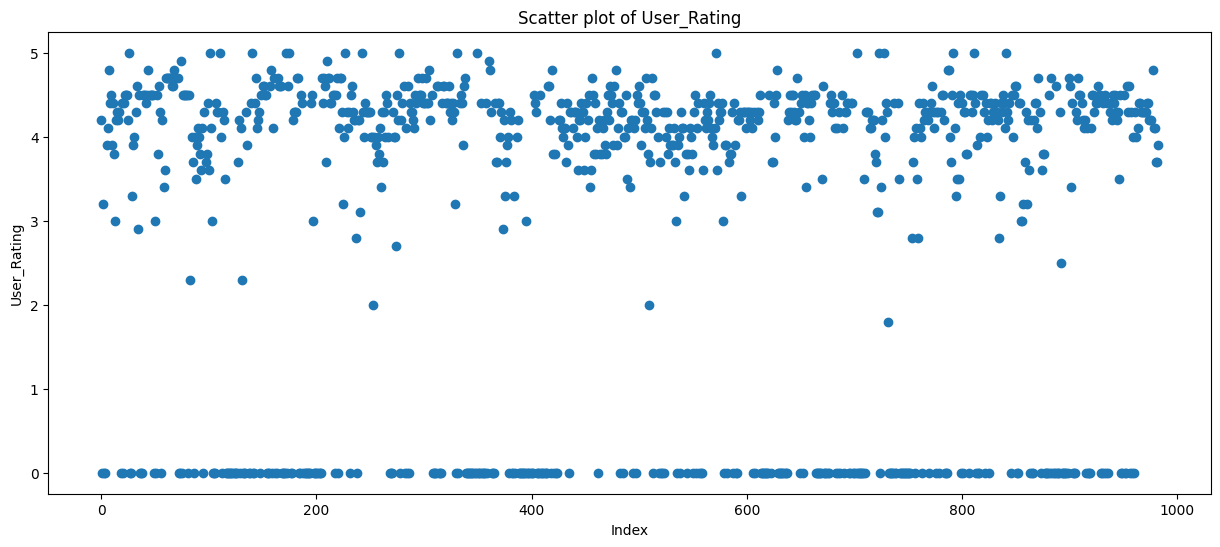

In [31]:
scatter_plot(features=df['User_Rating'])

In [32]:
df['Price_in_IDR'].value_counts()

Price_in_IDR
7715138     16
7338698     15
12232418    14
11103098    14
10350218    14
            ..
52699718     1
48935318     1
20419988     1
15149828     1
15168650     1
Name: count, Length: 433, dtype: int64

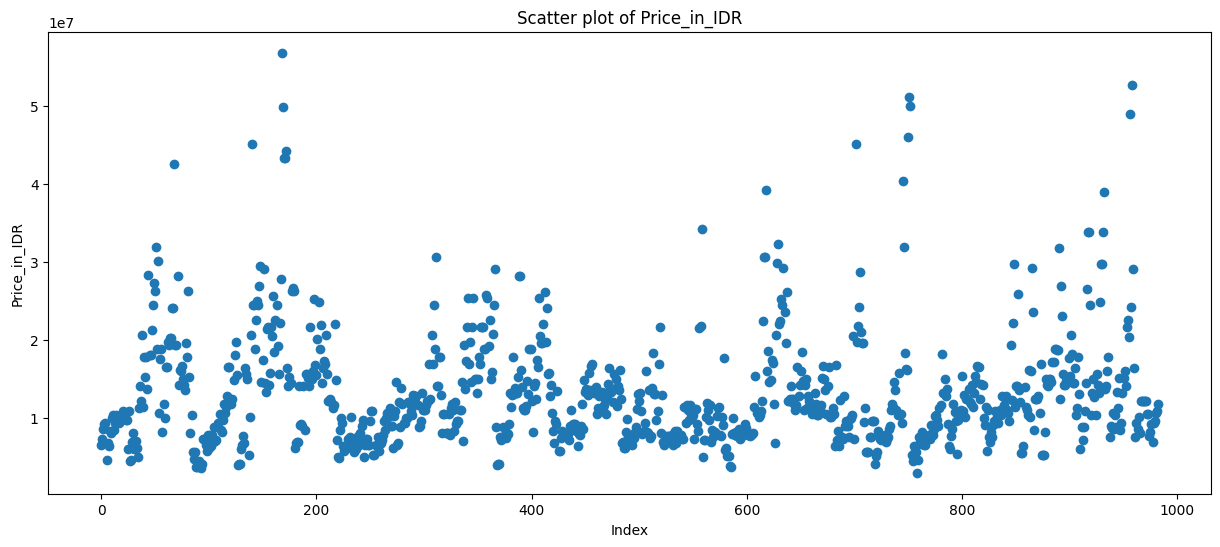

In [33]:
scatter_plot(features=df['Price_in_IDR'])

In [34]:
df['Laptop_Type'].value_counts()

Laptop_Type
Thin and Light Laptop    528
Gaming Laptop            231
Notebook                 160
2 in 1 Laptop             64
Name: count, dtype: int64

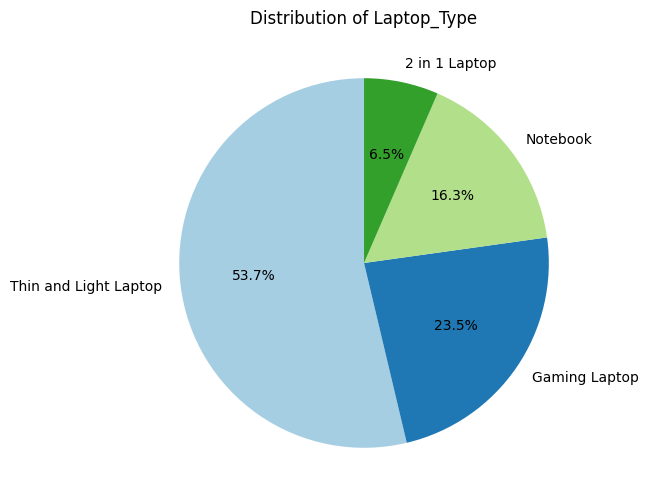

In [35]:
pie_plot(features=df['Laptop_Type'])

In [36]:
df['Dedicated_GPU_in_GB'].value_counts()

Dedicated_GPU_in_GB
0      674
4      185
2       59
6       39
8       19
16       2
128      2
12       1
512      1
10       1
Name: count, dtype: int64

In [37]:
df['Storage_Type'].value_counts()

Storage_Type
SSD    876
HDD    107
Name: count, dtype: int64

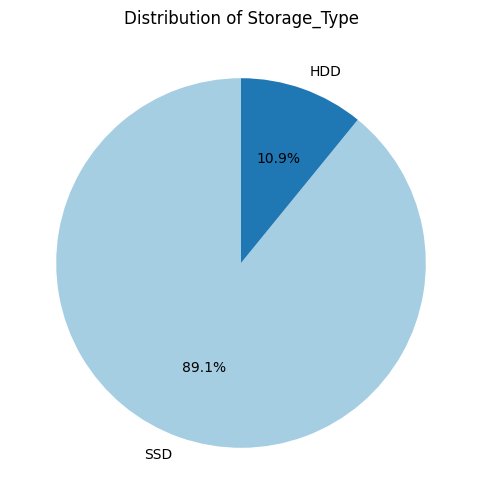

In [38]:
pie_plot(features=df['Storage_Type'])

In [39]:
df['RAM_in_GB'].value_counts()

RAM_in_GB
8     557
16    306
4     106
32     14
Name: count, dtype: int64

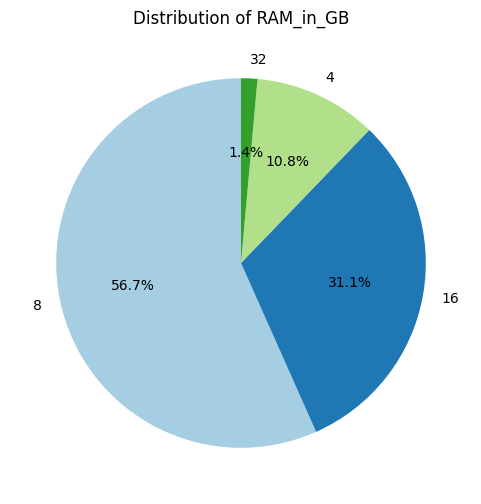

In [40]:
pie_plot(features=df['RAM_in_GB'])

In [41]:
df['RAM_Type'].value_counts()

RAM_Type
ddr4              855
lpddr4x            86
ddr5               20
lpddr4             14
lpddr5              4
lpddr3              2
unified memory      1
ddr3                1
Name: count, dtype: int64

In [42]:
df['Memory_Type'].value_counts()

Memory_Type
Non Expandable    601
Expandable        382
Name: count, dtype: int64

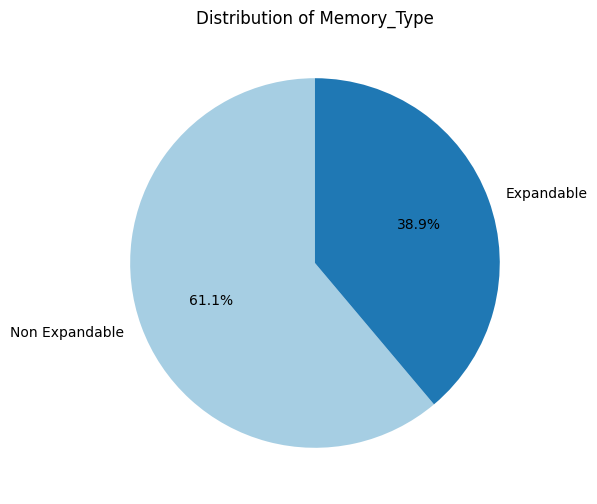

In [43]:
pie_plot(features=df['Memory_Type'])

In [44]:
df['OS'].value_counts()

OS
Windows      945
Chrome OS     17
Mac           12
Dos            8
Ubuntu         1
Name: count, dtype: int64

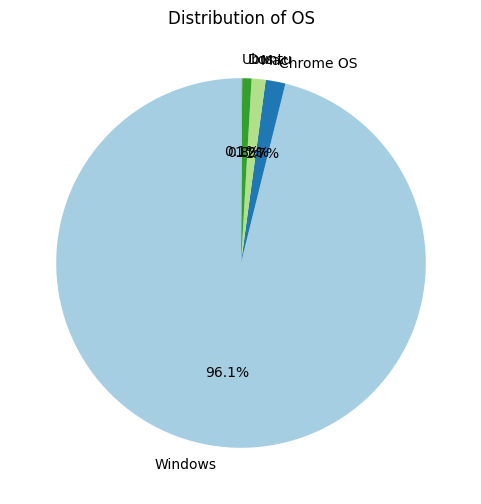

In [45]:
pie_plot(features=df['OS'])

In [46]:
df['Touchscreen_Features'].value_counts()

Touchscreen_Features
Non Touchscreen    858
Touchsreen         125
Name: count, dtype: int64

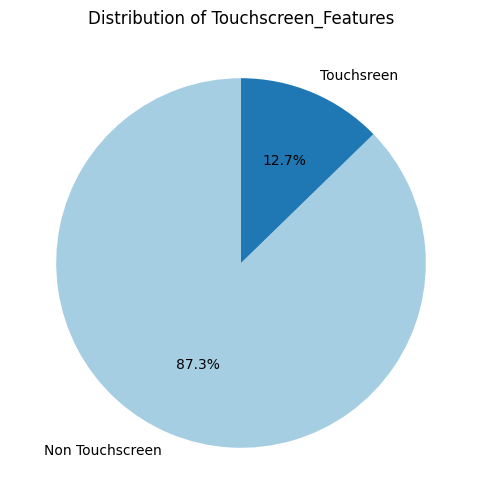

In [47]:
pie_plot(features=df['Touchscreen_Features'])

In [48]:
df['Screen_Size_in_Inch'].value_counts()

Screen_Size_in_Inch
15.60    497
14.00    321
13.30     55
11.60     16
17.30     16
16.10     13
13.40     13
14.96     12
14.10     11
16.00      9
13.50      4
15.00      4
13.00      3
12.00      2
14.20      1
15.30      1
16.60      1
14.90      1
14.50      1
14.22      1
13.60      1
Name: count, dtype: int64

In [49]:
df['Weight_in_Kg'].value_counts()

Weight_in_Kg
1.800000    114
9.974375     66
2.300000     43
1.400000     38
1.300000     38
           ... 
2.470000      1
2.330000      1
2.380000      1
1.790000      1
1.100000      1
Name: count, Length: 101, dtype: int64

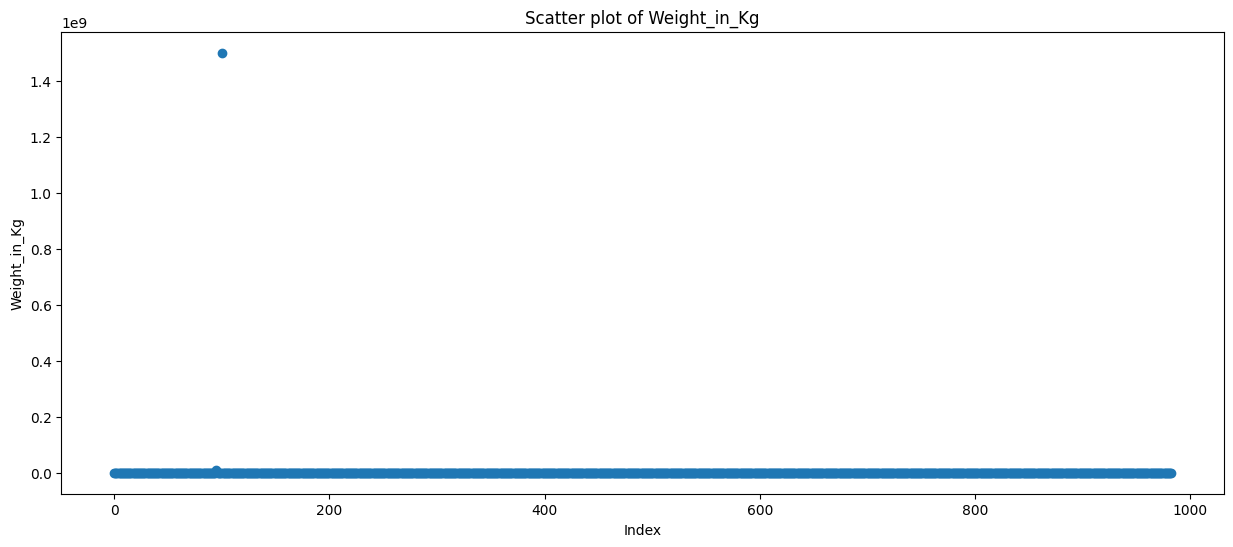

In [50]:
scatter_plot(features=df['Weight_in_Kg'])

In [51]:
df['Refresh_Rate'].value_counts()

Refresh_Rate
60    826
1      96
6      47
3       6
2       4
9       4
Name: count, dtype: int64

In [52]:
df['Screen_Resolution'].value_counts()

Screen_Resolution
1080    806
720      84
1440     80
2160     13
Name: count, dtype: int64

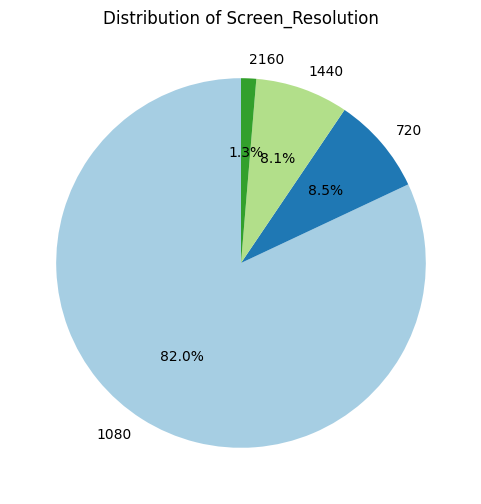

In [53]:
pie_plot(features=df['Screen_Resolution'])

In [54]:
df['Laptop_Company'].value_counts()

Laptop_Company
Asus         295
Dell         188
Lenovo       184
HP           152
Acer          60
MSI           53
Apple         12
Realme         9
Infinix        8
VAIO           5
Avita          4
Nokia          4
Redmibook      3
LG             3
MI             2
Samsung        1
Name: count, dtype: int64

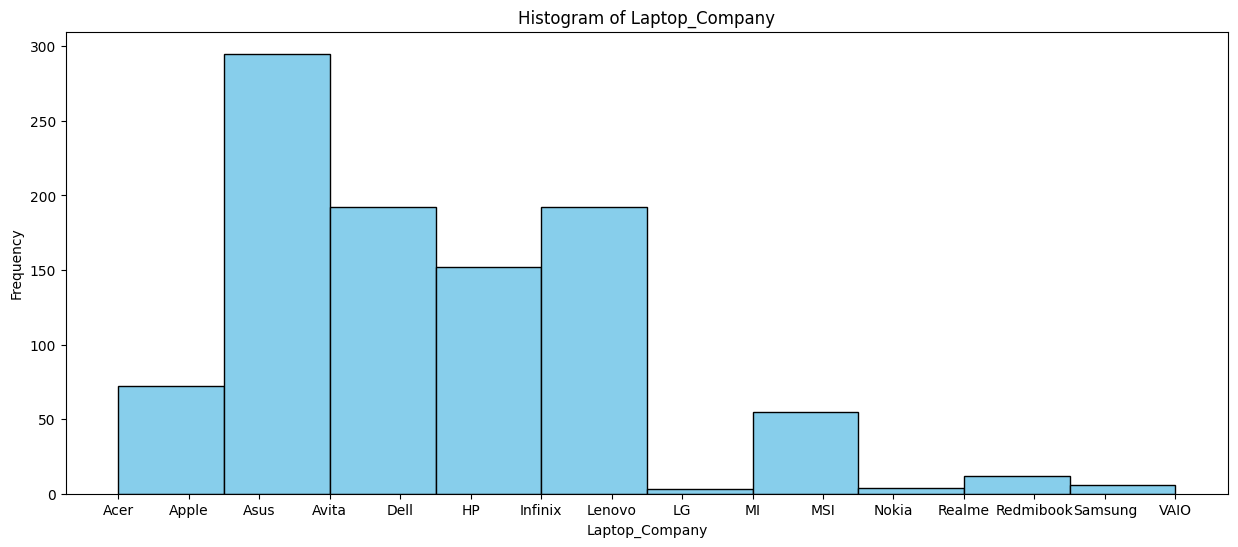

In [55]:
histogram_plot(features=df['Laptop_Company'])

In [56]:
df['Storage_Capacity'].value_counts()

Storage_Capacity
512     500
1000    215
256     139
1256     88
64       16
128      11
1024      5
1512      4
2000      3
32        1
516       1
Name: count, dtype: int64

In [57]:
df['Processor'].value_counts()

Processor
intel core i5 11th gen     224
intel core i3 11th gen     139
amd ryzen 5 hexa core       86
intel core i3 10th gen      76
intel core i7 11th gen      75
                          ... 
intel core i5 7th gen        1
intel core i9 10th gen       1
intel core i7 9th gen        1
intel ryzen 7 hexa core      1
intel core i3 7th gen        1
Name: count, Length: 61, dtype: int64

In [58]:
df['CPU_Rank'].value_counts()

CPU_Rank
108    224
362    139
87      88
540     76
61      75
187     60
64      58
745     31
48      27
560     25
330     25
97      24
38      16
148     11
873     10
24      10
110      8
579      7
75       6
45       6
4        5
674      5
69       5
206      4
167      4
590      4
109      3
123      2
180      2
767      2
707      2
880      2
907      2
58       1
331      1
70       1
352      1
77       1
36       1
676      1
34       1
342      1
63       1
428      1
74       1
113      1
178      1
530      1
Name: count, dtype: int64

In [59]:
df['Battery_Lifetime_in_Hrs'].value_counts()

Battery_Lifetime_in_Hrs
4.5    688
4.0    231
5.0     64
Name: count, dtype: int64

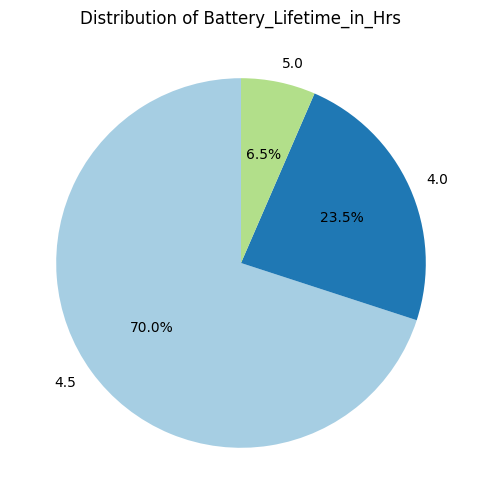

In [60]:
pie_plot(features=df['Battery_Lifetime_in_Hrs'])

In [61]:
df['GPU'].value_counts()

GPU
intel uhd                           248
intel iris xe                       134
amd radeon                          123
intel hd                             68
nvidia geforce rtx 3050              67
                                   ... 
amd radeon rx6600m                    1
amd radeon rx 6700m                   1
nvidia geforce rtx 2060               1
nvidia geforce gtx 1650 ti max-q      1
qualcomm adreno                       1
Name: count, Length: 61, dtype: int64

In [62]:
df['GPU_Benchmark_Score'].value_counts()

GPU_Benchmark_Score
5.05      248
17.50     178
102.00    123
4.23       69
72.60      67
59.90      64
132.00     40
59.00      30
33.80      19
10.60      17
41.80      13
33.00      12
16.50      12
1.53       11
154.00      9
83.30       7
168.00      6
3.07        5
4.82        5
70.90       4
10.90       4
36.40       3
70.20       3
7.00        2
2.13        2
78.40       2
3.50        2
76.50       2
6.00        2
1.00        2
14.50       2
109.00      1
3.71        1
93.90       1
18.00       1
233.00      1
9.95        1
6.33        1
1.87        1
17.00       1
10.40       1
36.00       1
93.70       1
4.61        1
6.80        1
42.60       1
78.10       1
88.70       1
42.00       1
Name: count, dtype: int64

In [63]:
df['RAM_Type_Tokenized'].value_counts()

RAM_Type_Tokenized
4    855
6     86
7     20
5     14
8      5
2      2
1      1
Name: count, dtype: int64

In [64]:
df['GPU_Processor_Tokenized'].value_counts()

GPU_Processor_Tokenized
7     248
8     134
5     123
3      68
2      67
     ... 
35      1
29      1
48      1
54      1
19      1
Name: count, Length: 62, dtype: int64

## Recommendation System - Content-Based Filtering

In [65]:
# method 1 rekomendasi ketika user memilih laptop atau ketika suatu laptop terdisplay (index)
# method 2 ketika user memilih feature (seperti nama laptop, atau spek ram atau storage)

In [66]:
df['Laptop_Full_Description'] = df['Laptop_Name'] + ' ' + df['Laptop_Type'] + ' ' + str(df['Storage_Capacity']) + 'GB ' + df['Storage_Type'] + ' ' + df['Memory_Type'] + ' ' + str(df['RAM_in_GB']) + 'GB '+ df['RAM_Type'] + ' ' + df['Processor'] + ' ' + df['GPU'] + str(df['Refresh_Rate']) +'Hz '+ str(df['Weight_in_Kg']) + 'Kg ' + str(df['Screen_Size_in_Inch']) + 'Inch ' + df['Touchscreen_Features'] + ' ' + df['OS'] + ' ' + str(df['Price_in_IDR']) + ' Rupiah'

In [67]:
df_vectorize = df[['Laptop_Index', 'Laptop_Full_Description']]

df_vectorize

,Laptop_Index,Laptop_Full_Description
0,1,acer aspire 3 gen_type(1) Thin and Light Lapto...
1,2,acer aspire 3 gen_type(2) Thin and Light Lapto...
2,3,acer aspire 3 gen_type(1) Notebook 0 256...
3,4,acer aspire 3 gen_type(1) Thin and Light Lapto...
4,5,acer aspire 3 gen_type(2) Thin and Light Lapto...
...,...,...
978,979,vaio e series 3500u_type(1) Thin and Light Lap...
979,980,vaio e series 3500u_type(2) Thin and Light Lap...
980,981,vaio e series 3700u_type(1) Thin and Light Lap...
981,982,vaio e series 3700u_type(2) Thin and Light Lap...


#### Vectorizing and Cosine Similarity

###### method 1 - based on selected indexing (all feature)

In [68]:
cv = CountVectorizer()

laptop_vector = cv.fit_transform(df_vectorize['Laptop_Full_Description'])
laptop_vector.shape

(983, 438)

In [69]:
laptop_similarity = cosine_similarity(laptop_vector)
laptop_similarity

array([[1.        , 0.99922451, 0.9859387 , ..., 0.98058238, 0.98058238,
        0.98990646],
       [0.99922451, 1.        , 0.98519844, ..., 0.98139653, 0.98139653,
        0.99069887],
       [0.9859387 , 0.98519844, 1.        , ..., 0.97433352, 0.97433352,
        0.98211574],
       ...,
       [0.98058238, 0.98139653, 0.97433352, ..., 1.        , 1.        ,
        0.98297214],
       [0.98058238, 0.98139653, 0.97433352, ..., 1.        , 1.        ,
        0.98297214],
       [0.98990646, 0.99069887, 0.98211574, ..., 0.98297214, 0.98297214,
        1.        ]])

In [70]:
laptop_similarity.shape

(983, 983)

In [71]:
def indexing_recommendation(laptop, display_num: int=10):
    index = df_vectorize[df_vectorize['Laptop_Index'] == laptop.index[0]].index[0]
    distances = laptop_similarity[index]
    recommendation_list = sorted(list(enumerate(distances)), reverse=True, key=lambda x:x[1])[1:display_num+1]

    return recommendation_list

In [72]:
index_parsing = df[df.index == 1]
index_parsing

,Laptop_Index,Link_References,Laptop_Name,User_Rating,Price_in_IDR,Laptop_Type,Dedicated_GPU_in_GB,Processor_Brand,Storage_Type,RAM_in_GB,...,Storage_Capacity,Processor,CPU_Rank,Battery_Lifetime_in_Hrs,GPU,GPU_Benchmark_Score,RAM_Type_Tokenized,GPU_Processor_Tokenized,Image_Link,Laptop_Full_Description
1,2,https://www.flipkart.com/acer-aspire-3-core-i3...,acer aspire 3 gen_type(2),0.0,7338698,Thin and Light Laptop,0,Intel,SSD,8,...,512,intel core i3 11th gen,362,4.5,intel uhd,5.05,4,7,https://rukminim2.flixcart.com/image/416/416/l...,acer aspire 3 gen_type(2) Thin and Light Lapto...


In [73]:
display(Image(url=index_parsing['Image_Link'].values[0], width=300, height=300))

In [74]:
index_recom = indexing_recommendation(laptop=index_parsing, display_num=5)

for i in index_recom:
    print(df.iloc[i[0]])
    print('-' * 50)

Laptop_Index                                                               2
Link_References            https://www.flipkart.com/acer-aspire-3-core-i3...
Laptop_Name                                        acer aspire 3 gen_type(2)
User_Rating                                                              0.0
Price_in_IDR                                                         7338698
Laptop_Type                                            Thin and Light Laptop
Dedicated_GPU_in_GB                                                        0
Processor_Brand                                                        Intel
Storage_Type                                                             SSD
RAM_in_GB                                                                  8
RAM_Type                                                                ddr4
Memory_Type                                                   Non Expandable
OS                                                                   Windows

In [75]:
for laptop in index_recom:
    image_url = df.iloc[laptop[0]]['Image_Link'] 
    display(Image(url=image_url, width=300, height=300))

###### method 2 - based on selected features

In [76]:
tfidf = TfidfVectorizer()

tfidf_matrix = tfidf.fit_transform(df_vectorize['Laptop_Full_Description'])
tfidf_matrix.shape

(983, 438)

In [77]:
def text_recommendation(input_text, num_display: int=10):
    if not isinstance(input_text, str):
        input_text = str(input_text)

    input_vector = tfidf.transform([input_text])
    cosine_sim = linear_kernel(input_vector, tfidf_matrix).flatten()
    
    similarity_score = sorted(enumerate(cosine_sim), key=lambda x: x[1], reverse=True)
    similarity_score = similarity_score[1:num_display+1]
    
    return similarity_score

In [78]:
search_text = 'AMD Ryzen'

text_recom = text_recommendation(input_text=search_text, num_display=5)

In [79]:
for i in text_recom:
    print(df.iloc[i[0]])
    print('-' * 50)

Laptop_Index                                                             692
Link_References            https://www.flipkart.com/hp-ryzen-5-hexa-core-...
Laptop_Name                                                  hp core_type(2)
User_Rating                                                              4.3
Price_in_IDR                                                         9032678
Laptop_Type                                                         Notebook
Dedicated_GPU_in_GB                                                        0
Processor_Brand                                                          AMD
Storage_Type                                                             SSD
RAM_in_GB                                                                  8
RAM_Type                                                                ddr4
Memory_Type                                                   Non Expandable
OS                                                                   Windows

In [80]:
for laptop in text_recom:
    image_url = df.iloc[laptop[0]]['Image_Link'] 
    display(Image(url=image_url, width=300, height=300))

## Add On Filtering

In [81]:
df.columns

Index(['Laptop_Index', 'Link_References', 'Laptop_Name', 'User_Rating',
       'Price_in_IDR', 'Laptop_Type', 'Dedicated_GPU_in_GB', 'Processor_Brand',
       'Storage_Type', 'RAM_in_GB', 'RAM_Type', 'Memory_Type', 'OS',
       'Touchscreen_Features', 'Screen_Size_in_Inch', 'Weight_in_Kg',
       'Refresh_Rate', 'Screen_Resolution', 'Laptop_Company',
       'Storage_Capacity', 'Processor', 'CPU_Rank', 'Battery_Lifetime_in_Hrs',
       'GPU', 'GPU_Benchmark_Score', 'RAM_Type_Tokenized',
       'GPU_Processor_Tokenized', 'Image_Link', 'Laptop_Full_Description'],
      dtype='object')

In [82]:
df['Storage_Type'].unique()

array(['SSD', 'HDD'], dtype=object)

#### Normal Filtering based on Features

###### by price ranges features

In [83]:
def filter_by_price(min_price=None, max_price=None, show_num: int=None, reversed: bool=False):
    filtered_df = df.copy()
    
    if min_price is not None:
        filtered_df = filtered_df[filtered_df['Price_in_IDR'] >= min_price]
    if max_price is not None:
        filtered_df = filtered_df[filtered_df['Price_in_IDR'] <= max_price]
    
    sorted_df = filtered_df.sort_values(by='Price_in_IDR', ascending=reversed)
    
    if show_num is not None:
        return sorted_df.head(show_num)
        
    return sorted_df

In [84]:
min_price = 5000000
max_price = 10000000

filter_by_price(min_price=min_price, max_price=max_price, show_num=5, reversed=False)

,Laptop_Index,Link_References,Laptop_Name,User_Rating,Price_in_IDR,Laptop_Type,Dedicated_GPU_in_GB,Processor_Brand,Storage_Type,RAM_in_GB,...,Storage_Capacity,Processor,CPU_Rank,Battery_Lifetime_in_Hrs,GPU,GPU_Benchmark_Score,RAM_Type_Tokenized,GPU_Processor_Tokenized,Image_Link,Laptop_Full_Description
59,60,https://www.flipkart.com/acer-travelmate-core-...,acer travelmate gen_type(2),3.6,9973778,Thin and Light Laptop,0,Intel,SSD,8,...,1256,intel core i5 11th gen,108,4.5,intel iris xe,17.5,4,8,https://rukminim2.flixcart.com/image/416/416/k...,acer travelmate gen_type(2) Thin and Light Lap...
820,821,https://www.flipkart.com/lenovo-ideapad-ryzen-...,lenovo ideapad 5500u_type(1),4.3,9973778,Thin and Light Laptop,0,AMD,SSD,8,...,512,amd ryzen 5 hexa core,87,4.5,amd radeon,102.0,4,5,https://rukminim2.flixcart.com/image/416/416/k...,lenovo ideapad 5500u_type(1) Thin and Light La...
223,224,https://www.flipkart.com/asus-vivobook-14-2021...,asus vivobook 14 (2021) 3700u_type(1),4.7,9973778,Thin and Light Laptop,0,AMD,SSD,16,...,512,amd ryzen 7 quad core,75,4.5,amd radeon rx vega 10,10.9,4,15,https://rukminim2.flixcart.com/image/416/416/x...,asus vivobook 14 (2021) 3700u_type(1) Thin and...
697,698,https://www.flipkart.com/hp-ryzen-5-quad-core-...,hp 3500u_type(1),4.4,9973778,Thin and Light Laptop,0,AMD,SSD,8,...,1256,amd ryzen 5 quad core,330,4.5,amd radeon,102.0,4,5,https://rukminim2.flixcart.com/image/416/416/k...,hp 3500u_type(1) Thin and Light Laptop 0 ...
265,266,https://www.flipkart.com/asus-vivobook-15-core...,asus vivobook 15 gen_type(1),4.5,9973778,Notebook,0,Intel,SSD,8,...,512,intel core i5 11th gen,108,4.5,intel iris xe,17.5,4,8,https://rukminim2.flixcart.com/image/416/416/k...,asus vivobook 15 gen_type(1) Notebook 0 ...


###### by keywords arguments of choosen features

In [85]:
def filter_by_features(dataframe=None, display_num: int=None, **kwargs):
    if dataframe is not None:
        filtered_df = dataframe
    if dataframe is None:
        filtered_df = df.copy()
    column_map = {col.lower(): col for col in df.columns}

    valid_kwargs = {key: value for key, value in kwargs.items() if key.lower() not in {'display_num'}}
        
    for key, value in valid_kwargs.items():
        if key.lower() == 'price_in_idr':
            raise KeyError(f"Params '{key}' should not be use, instead change dataframe with filtered by price")
        if value is not None:
            normalized_key = column_map.get(key.lower())
            if normalized_key is None:
                raise KeyError(f"Column '{key}' not found in DataFrame")
            
            if isinstance(value, str):
                filtered_df = filtered_df[filtered_df[normalized_key].str.casefold() == value.casefold()]
            else:
                filtered_df = filtered_df[filtered_df[normalized_key] == value]
    
    if display_num is not None:
        return filtered_df.head(display_num)

    return filtered_df

In [ ]:
features_option = {
    'User_Rating': None,
    'Laptop_Type': 'Notebook',
    'Processor_Brand': None,
    'Storage_Type': 'SSD',
    'Touchsreen_Features': None,
    'RAM_Type': None,
    'Memory_Type': None,
    'Laptop_Company': None,
    'GPU': None
}

filter_by_features(
    dataframe = filter_by_price(min_price=5000000, max_price=10000000),
    display_num = 5,
    **features_option           
)

,Laptop_Index,Link_References,Laptop_Name,User_Rating,Price_in_IDR,Laptop_Type,Dedicated_GPU_in_GB,Processor_Brand,Storage_Type,RAM_in_GB,...,Storage_Capacity,Processor,CPU_Rank,Battery_Lifetime_in_Hrs,GPU,GPU_Benchmark_Score,RAM_Type_Tokenized,GPU_Processor_Tokenized,Image_Link,Laptop_Full_Description
265,266,https://www.flipkart.com/asus-vivobook-15-core...,asus vivobook 15 gen_type(1),4.5,9973778,Notebook,0,Intel,SSD,8,...,512,intel core i5 11th gen,108,4.5,intel iris xe,17.50,4,8,https://rukminim2.flixcart.com/image/416/416/k...,asus vivobook 15 gen_type(1) Notebook 0 ...
696,697,https://www.flipkart.com/hp-ryzen-5-quad-core-...,hp core_type(1),0.0,9858964,Notebook,0,AMD,SSD,8,...,512,amd ryzen 5 quad core,330,4.5,amd radeon,102.00,4,5,https://rukminim2.flixcart.com/image/416/416/l...,hp core_type(1) Notebook 0 256\n1 ...
516,517,https://www.flipkart.com/dell-ryzen-5-quad-cor...,dell core_type(1),4.3,9785558,Notebook,0,AMD,SSD,8,...,1256,amd ryzen 5 quad core,330,4.5,amd radeon vega 8,10.60,4,11,https://rukminim2.flixcart.com/image/416/416/k...,dell core_type(1) Notebook 0 256\n1 ...
422,423,https://www.flipkart.com/dell-inspiron-3511-co...,dell inspiron 3511 gen_type(1),3.8,9599032,Notebook,0,Intel,SSD,16,...,1256,intel core i3 11th gen,362,4.5,intel hd,4.23,4,3,https://rukminim2.flixcart.com/image/416/416/k...,dell inspiron 3511 gen_type(1) Notebook 0 ...
331,332,https://www.flipkart.com/asus-vivobook-ultra-k...,asus vivobook ultra k15 gen_type(2),5.0,9587927,Notebook,0,Intel,SSD,8,...,512,intel core i3 11th gen,362,4.5,intel uhd,5.05,4,7,https://rukminim2.flixcart.com/image/416/416/k...,asus vivobook ultra k15 gen_type(2) Notebook 0...


#### Top Rated based on Features

###### by laptop type features

In [87]:
def rated_by_type(laptop_type: str, show_num: int=None, reversed: bool=False):
    filtered_df = df.copy()
    laptop_type = laptop_type.strip().upper()

    if laptop_type in df['Laptop_Type'].str.upper().unique():
        filtered_df = filtered_df[filtered_df['Laptop_Type'].str.upper() == laptop_type]
     
    sorted_df = filtered_df.sort_values(by='User_Rating', ascending=reversed)

    if show_num is not None:
        return sorted_df.head(show_num)

    return sorted_df

In [ ]:
type_option = {
    1: 'Gaming Laptop',
    2: 'Thin and Light Laptop',
    3: '2 in 1 Laptop',
    4: 'Notebook'
}

rated_by_type(laptop_type=type_option[1])

,Laptop_Index,Link_References,Laptop_Name,User_Rating,Price_in_IDR,Laptop_Type,Dedicated_GPU_in_GB,Processor_Brand,Storage_Type,RAM_in_GB,...,Storage_Capacity,Processor,CPU_Rank,Battery_Lifetime_in_Hrs,GPU,GPU_Benchmark_Score,RAM_Type_Tokenized,GPU_Processor_Tokenized,Image_Link,Laptop_Full_Description
140,141,https://www.flipkart.com/asus-rog-flow-x13-202...,asus rog flow x13 (2021) 5980hs_type(1),5.0,45170918,Gaming Laptop,4,AMD,SSD,32,...,1000,amd ryzen 9 octa core,48,4.0,nvidia geforce gtx 1650,59.9,6,6,https://rukminim2.flixcart.com/image/416/416/x...,asus rog flow x13 (2021) 5980hs_type(1) Gaming...
172,173,https://www.flipkart.com/asus-rog-strix-scar-1...,asus rog strix scar 17 gen_type(1),5.0,44229818,Gaming Laptop,8,Intel,SSD,32,...,1000,intel core i9 12th gen,4,4.0,nvidia geforce rtx 3070 ti,168.0,7,1,https://rukminim2.flixcart.com/image/416/416/l...,asus rog strix scar 17 gen_type(1) Gaming Lapt...
175,176,https://www.flipkart.com/asus-rog-zephyrus-g14...,asus rog zephyrus g14,5.0,15320920,Gaming Laptop,4,AMD,SSD,8,...,1000,amd ryzen 7 octa core 4th gen,110,4.0,nvidia geforce gtx 1650,59.9,4,6,https://rukminim2.flixcart.com/image/416/416/k...,asus rog zephyrus g14 Gaming Laptop 0 25...
811,812,https://www.flipkart.com/lenovo-ideapad-gaming...,lenovo ideapad gaming 3 5600h_type(2),5.0,13173518,Gaming Laptop,4,AMD,SSD,8,...,512,amd ryzen 5 hexa core,87,4.0,nvidia geforce rtx 3050,72.6,4,2,https://rukminim2.flixcart.com/image/416/416/x...,lenovo ideapad gaming 3 5600h_type(2) Gaming L...
74,75,https://www.flipkart.com/asus-tuf-dash-f15-cor...,asus asus tuf dash f15 gen_type(1),4.9,15996818,Gaming Laptop,6,Intel,SSD,16,...,512,intel core i5 11th gen,108,4.0,nvidia geforce rtx 3060,132.0,4,12,https://rukminim2.flixcart.com/image/416/416/l...,asus asus tuf dash f15 gen_type(1) Gaming Lapt...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
930,931,https://www.flipkart.com/msi-gp66-leopard-core...,msi gp66 leopard gen_type(2),0.0,29789579,Gaming Laptop,8,Intel,SSD,16,...,1000,intel core i7 11th gen,61,4.0,nvidia geforce rtx 3070,154.0,4,9,https://rukminim2.flixcart.com/image/416/416/l...,msi gp66 leopard gen_type(2) Gaming Laptop 0 ...
936,937,https://www.flipkart.com/msi-katana-gf66-core-...,msi katana gf66 gen_type(2),0.0,17879018,Gaming Laptop,4,Intel,SSD,16,...,512,intel core i7 11th gen,61,4.0,nvidia geforce rtx 3050 ti,59.0,4,10,https://rukminim2.flixcart.com/image/416/416/k...,msi katana gf66 gen_type(2) Gaming Laptop 0 ...
956,957,https://www.flipkart.com/msi-raider-ge66-core-...,msi raider ge66 gen_type(1),0.0,48935318,Gaming Laptop,8,Intel,SSD,16,...,1000,intel core i7 12th gen,38,4.0,nvidia geforce rtx 3070 ti,168.0,7,1,https://rukminim2.flixcart.com/image/416/416/x...,msi raider ge66 gen_type(1) Gaming Laptop 0 ...
958,959,https://www.flipkart.com/msi-stealth-gs66-core...,msi stealth gs66 gen_type(1),0.0,52699718,Gaming Laptop,8,Intel,SSD,32,...,1000,intel core i7 12th gen,38,4.0,nvidia geforce rtx 3070 ti,168.0,7,1,https://rukminim2.flixcart.com/image/416/416/k...,msi stealth gs66 gen_type(1) Gaming Laptop 0 ...


###### by ranges price features

In [89]:
def rated_by_price(min_price=None, max_price=None, show_num: int=None, reversed: bool=False):
    filtered_df = df.copy()
    
    if min_price is not None:
        filtered_df = filtered_df[filtered_df['Price_in_IDR'] >= min_price]
    if max_price is not None:
        filtered_df = filtered_df[filtered_df['Price_in_IDR'] <= max_price]
    
    sorted_df = filtered_df.sort_values(by='User_Rating', ascending=reversed)
    
    if show_num is not None:
        return sorted_df.head(show_num)

    return sorted_df

In [90]:
min_price = 1000000
max_price = 5000000

rated_by_price(min_price=min_price, max_price=max_price)

,Laptop_Index,Link_References,Laptop_Name,User_Rating,Price_in_IDR,Laptop_Type,Dedicated_GPU_in_GB,Processor_Brand,Storage_Type,RAM_in_GB,...,Storage_Capacity,Processor,CPU_Rank,Battery_Lifetime_in_Hrs,GPU,GPU_Benchmark_Score,RAM_Type_Tokenized,GPU_Processor_Tokenized,Image_Link,Laptop_Full_Description
369,370,https://www.flipkart.com/avita-satus-celeron-d...,avita satus core_type(1),4.4,4138958,Notebook,0,Intel,SSD,4,...,128,intel celeron dual core,745,4.5,intel uhd,5.05,4,7,https://rukminim2.flixcart.com/image/416/416/l...,avita satus core_type(1) Notebook 0 256\...
370,371,https://www.flipkart.com/avita-satus-celeron-d...,avita satus core_type(2),4.4,4138958,Notebook,0,Intel,SSD,4,...,128,intel celeron dual core,745,4.5,intel uhd,5.05,4,7,https://rukminim2.flixcart.com/image/416/416/l...,avita satus core_type(2) Notebook 0 256\...
128,129,https://www.flipkart.com/asus-eeebook-12-celer...,asus eeebook 12 core_type(2),4.2,4138958,Thin and Light Laptop,0,Intel,HDD,4,...,64,intel celeron dual core,745,4.5,intel uhd 600,1.53,4,14,https://rukminim2.flixcart.com/image/416/416/x...,asus eeebook 12 core_type(2) Thin and Light La...
90,91,https://www.flipkart.com/asus-chromebook-celer...,asus chromebook core_type(3),4.1,4327178,Notebook,0,Intel,HDD,4,...,64,intel celeron dual core,745,4.5,intel hd 500,3.07,5,42,https://rukminim2.flixcart.com/image/416/416/x...,asus chromebook core_type(3) Notebook 0 ...
94,95,https://www.flipkart.com/asus-chromebook-flip-...,asus chromebook flip core_type(1),4.1,4138958,Notebook,0,Intel,HDD,4,...,64,intel celeron dual core,745,4.5,intel uhd 600,1.53,5,14,https://rukminim2.flixcart.com/image/416/416/x...,asus chromebook flip core_type(1) Notebook 0 ...
221,222,https://www.flipkart.com/asus-vivobook-14-2021...,asus vivobook 14 (2021) core_type(1),4.1,4891838,Thin and Light Laptop,0,Intel,SSD,4,...,256,intel celeron dual core,745,4.5,intel uhd,5.05,4,7,https://rukminim2.flixcart.com/image/416/416/x...,asus vivobook 14 (2021) core_type(1) Thin and ...
91,92,https://www.flipkart.com/asus-chromebook-celer...,asus chromebook core_type(4),4.0,4515398,Notebook,0,Intel,HDD,4,...,64,intel celeron dual core,745,4.5,intel hd 500,3.07,5,42,https://rukminim2.flixcart.com/image/416/416/x...,asus chromebook core_type(4) Notebook 0 ...
5,6,https://www.flipkart.com/acer-aspire-3-dual-co...,acer aspire 3 3020e_type(1),3.9,4703618,Notebook,0,AMD,SSD,4,...,256,amd dual core,560,4.5,amd radeon,102.00,4,5,https://rukminim2.flixcart.com/image/416/416/x...,acer aspire 3 3020e_type(1) Notebook 0 2...
89,90,https://www.flipkart.com/asus-chromebook-celer...,asus chromebook core_type(2),3.9,3762518,Notebook,0,Intel,HDD,4,...,64,intel celeron dual core,745,4.5,intel hd 500,3.07,5,42,https://rukminim2.flixcart.com/image/416/416/x...,asus chromebook core_type(2) Notebook 0 ...
584,585,https://www.flipkart.com/hp-chromebook-mediate...,hp chromebook 500_type(1),3.8,3856628,Notebook,0,Mediatek,HDD,4,...,64,mediatek mediatek kompanio 500,707,4.5,mediatek,1.00,4,41,https://rukminim2.flixcart.com/image/416/416/x...,hp chromebook 500_type(1) Notebook 0 256...


###### by processor brand features

In [91]:
def rated_by_processor(processor_brand: str, show_num: int=None, reversed: bool=False):
    filtered_df = df.copy()
    processor_brand = processor_brand.strip().upper()

    if processor_brand in df['Processor_Brand'].str.upper().unique():
        filtered_df = filtered_df[filtered_df['Processor_Brand'].str.upper() == processor_brand]
     
    sorted_df = filtered_df.sort_values(by='User_Rating', ascending=reversed)

    return sorted_df.head(show_num)

In [92]:
brand_option = {
    1: 'Intel',
    2: 'AMD',
    3: 'Qualcomm',
    4: 'Apple',
    5: 'Mediatek'
}

rated_by_processor(processor_brand=brand_option[4], show_num=5)

,Laptop_Index,Link_References,Laptop_Name,User_Rating,Price_in_IDR,Laptop_Type,Dedicated_GPU_in_GB,Processor_Brand,Storage_Type,RAM_in_GB,...,Storage_Capacity,Processor,CPU_Rank,Battery_Lifetime_in_Hrs,GPU,GPU_Benchmark_Score,RAM_Type_Tokenized,GPU_Processor_Tokenized,Image_Link,Laptop_Full_Description
68,69,https://www.flipkart.com/apple-2021-macbook-pr...,2021 macbook pro_type(1),4.8,42535838,Thin and Light Laptop,0,Apple,SSD,16,...,1000,apple m1 pro,36,4.5,m1,33.0,8,32,https://rukminim2.flixcart.com/image/416/416/k...,2021 macbook pro_type(1) Thin and Light Laptop...
60,61,https://www.flipkart.com/apple-2020-macbook-ai...,2020 macbook air m1_type(1),4.7,16561478,Thin and Light Laptop,0,Apple,SSD,8,...,256,apple m1,148,4.5,m1,33.0,4,32,https://rukminim2.flixcart.com/image/416/416/k...,2020 macbook air m1_type(1) Thin and Light Lap...
62,63,https://www.flipkart.com/apple-2020-macbook-ai...,2020 macbook air m1_type(3),4.7,19761218,Thin and Light Laptop,0,Apple,SSD,8,...,512,apple m1,148,4.5,m1,33.0,4,32,https://rukminim2.flixcart.com/image/416/416/k...,2020 macbook air m1_type(3) Thin and Light Lap...
61,62,https://www.flipkart.com/apple-2020-macbook-ai...,2020 macbook air m1_type(2),4.7,16561478,Thin and Light Laptop,0,Apple,SSD,8,...,256,apple m1,148,4.5,m1,33.0,4,32,https://rukminim2.flixcart.com/image/416/416/k...,2020 macbook air m1_type(2) Thin and Light Lap...
63,64,https://www.flipkart.com/apple-2020-macbook-ai...,2020 macbook air m1_type(4),4.7,19384778,Thin and Light Laptop,0,Apple,SSD,8,...,512,apple m1,148,4.5,m1,33.0,4,32,https://rukminim2.flixcart.com/image/416/416/k...,2020 macbook air m1_type(4) Thin and Light Lap...


###### by laptop company features

In [93]:
def rated_by_company(laptop_company: str, show_num: int=None, reversed: bool=False):
    filtered_df = df.copy()
    laptop_company = laptop_company.strip().upper()

    if laptop_company in df['Laptop_Company'].str.upper().unique():
        filtered_df = filtered_df[filtered_df['Laptop_Company'].str.upper() == laptop_company]
     
    sorted_df = filtered_df.sort_values(by='User_Rating', ascending=reversed)

    if show_num is not None:
        return sorted_df.head(show_num)

    return sorted_df

In [94]:
company_option = {
    1: 'Asus',
    2: 'HP',
    3: 'Lenovo',
    4: 'Dell',
    5: 'MSI', 
    6: 'Realme',
    7: 'Avita',
    8: 'Acer',
    9: 'Samsung',
    10: 'Infinix',
    11: 'LG',
    12: 'Apple',
    13: 'Nokia',
    14: 'Redmibook',
    15: 'MI',
    16: 'VAIO'
}

rated_by_company(laptop_company=company_option[5], show_num=5)

,Laptop_Index,Link_References,Laptop_Name,User_Rating,Price_in_IDR,Laptop_Type,Dedicated_GPU_in_GB,Processor_Brand,Storage_Type,RAM_in_GB,...,Storage_Capacity,Processor,CPU_Rank,Battery_Lifetime_in_Hrs,GPU,GPU_Benchmark_Score,RAM_Type_Tokenized,GPU_Processor_Tokenized,Image_Link,Laptop_Full_Description
908,909,https://www.flipkart.com/msi-alpha-15-ryzen-7-...,msi alpha 15 5800h_type(1),4.7,17879018,Gaming Laptop,8,AMD,SSD,16,...,1000,amd ryzen 7 octa core,64,4.0,amd radeon rx6600m,70.2,4,35,https://rukminim2.flixcart.com/image/416/416/k...,msi alpha 15 5800h_type(1) Gaming Laptop 0 ...
926,927,https://www.flipkart.com/msi-gf65-thin-hexa-co...,msi gf65 thin gen_type(1),4.6,14302838,Gaming Laptop,6,Intel,SSD,16,...,512,intel hexa core i5 10th gen,109,4.0,nvidia geforce gtx 1660 ti,76.5,4,47,https://rukminim2.flixcart.com/image/416/416/k...,msi gf65 thin gen_type(1) Gaming Laptop 0 ...
953,954,https://www.flipkart.com/msi-pulse-gl66-core-i...,msi pulse gl66 gen_type(1),4.6,21643418,Gaming Laptop,6,Intel,SSD,16,...,1000,intel core i7 11th gen,61,4.0,nvidia geforce rtx 3060,132.0,4,12,https://rukminim2.flixcart.com/image/416/416/k...,msi pulse gl66 gen_type(1) Gaming Laptop 0 ...
955,956,https://www.flipkart.com/msi-pulse-gl66-core-i...,msi pulse gl66 gen_type(3),4.6,20419988,Gaming Laptop,4,Intel,SSD,16,...,512,intel core i7 11th gen,61,4.0,nvidia geforce rtx 3050 ti,59.0,4,10,https://rukminim2.flixcart.com/image/416/416/k...,msi pulse gl66 gen_type(3) Gaming Laptop 0 ...
909,910,https://www.flipkart.com/msi-bravo-ryzen-5-hex...,msi bravo 5600h_type(1),4.5,13079408,Gaming Laptop,4,AMD,SSD,8,...,512,amd ryzen 5 hexa core,87,4.0,amd radeon 5500m,42.6,4,38,https://rukminim2.flixcart.com/image/416/416/x...,msi bravo 5600h_type(1) Gaming Laptop 0 ...


###### by memory type features

In [95]:
def rated_by_memory(storage_type: str, show_num: int=None, reversed: bool=False):
    filtered_df = df.copy()
    storage_type = storage_type.strip().upper()

    if storage_type == "HDD" or storage_type == "SSD":
        filtered_df = filtered_df[filtered_df['Storage_Type'] == storage_type]
     
    sorted_df = filtered_df.sort_values(by='User_Rating', ascending=reversed)

    if show_num is not None:
        return sorted_df.head(show_num)

    return sorted_df

In [96]:
memory_option = {
    1: 'HDD',
    2: 'SSD'
}

rated_by_memory(storage_type=memory_option[1], show_num=5)

,Laptop_Index,Link_References,Laptop_Name,User_Rating,Price_in_IDR,Laptop_Type,Dedicated_GPU_in_GB,Processor_Brand,Storage_Type,RAM_in_GB,...,Storage_Capacity,Processor,CPU_Rank,Battery_Lifetime_in_Hrs,GPU,GPU_Benchmark_Score,RAM_Type_Tokenized,GPU_Processor_Tokenized,Image_Link,Laptop_Full_Description
977,978,https://www.flipkart.com/samsung-galaxy-book-g...,samsung galaxy book go 2_type(1),4.8,6962258,Thin and Light Laptop,0,Qualcomm,HDD,4,...,128,qualcomm snapdragon 7c gen 2,590,4.5,qualcomm adreno,6.00,6,19,https://rukminim2.flixcart.com/image/416/416/l...,samsung galaxy book go 2_type(1) Thin and Ligh...
219,220,https://www.flipkart.com/asus-vivo-book-core-i...,asus vivo book gen_type(1),4.7,7152360,Notebook,0,Intel,HDD,4,...,1000,intel core i3 10th gen,540,4.5,intel hd,4.23,4,3,https://rukminim2.flixcart.com/image/416/416/k...,asus vivo book gen_type(1) Notebook 0 25...
128,129,https://www.flipkart.com/asus-eeebook-12-celer...,asus eeebook 12 core_type(2),4.2,4138958,Thin and Light Laptop,0,Intel,HDD,4,...,64,intel celeron dual core,745,4.5,intel uhd 600,1.53,4,14,https://rukminim2.flixcart.com/image/416/416/x...,asus eeebook 12 core_type(2) Thin and Light La...
507,508,https://www.flipkart.com/dell-insprion-3501-co...,dell insprion 3501 gen_type(1),4.2,8185688,Notebook,0,Intel,HDD,8,...,1000,intel core i3 11th gen,362,4.5,intel hd,4.23,4,3,https://rukminim2.flixcart.com/image/416/416/k...,dell insprion 3501 gen_type(1) Notebook 0 ...
726,727,https://www.flipkart.com/lenovo-core-i3-10th-g...,lenovo gen_type(5),4.2,7338698,Notebook,0,Intel,HDD,8,...,1000,intel core i3 10th gen,540,4.5,intel uhd,5.05,4,7,https://rukminim2.flixcart.com/image/416/416/l...,lenovo gen_type(5) Notebook 0 256\n1 ...


###### by combined features

In [97]:
def rated_by_fetures(min_price: int=None, max_price: int=None, laptop_type: str=None, storage_type: str=None, memory_type: str=None, laptop_company: str=None, processor_brand: str=None, show_num: int=None, reversed=False):
    filtered_df = df.copy()

    if laptop_type is not None:
        laptop_type = laptop_type.strip().upper()
        if laptop_type in df['Laptop_Type'].str.upper().unique():
            filtered_df = filtered_df[filtered_df['Laptop_Type'].str.upper() == laptop_type]

    if min_price is not None:
        filtered_df = filtered_df[filtered_df['Price_in_IDR'] >= min_price]
    if max_price is not None:
        filtered_df = filtered_df[filtered_df['Price_in_IDR'] <= max_price]

    if processor_brand is not None:
        processor_brand = processor_brand.strip().upper()
        if processor_brand in df['Processor_Brand'].str.upper().unique():
            filtered_df = filtered_df[filtered_df['Processor_Brand'].str.upper() == processor_brand]

    if storage_type is not None:
        storage_type = storage_type.strip().upper()
        if storage_type in df['Storage_Type'].str.upper().unique():
            filtered_df = filtered_df[filtered_df['Storage_Type'].str.upper() == storage_type]

    if memory_type is not None:
        memory_type = memory_type.strip().upper()
        if memory_type in df['Memory_Type'].str.upper().unique():
            filtered_df = filtered_df[filtered_df['Memory_Type'].str.upper() == memory_type]

    if laptop_company is not None:
        laptop_company = laptop_company.strip().upper()
        if laptop_company in df['Laptop_Company'].str.upper().unique():
            filtered_df = filtered_df[filtered_df['Laptop_Company'].str.upper() == laptop_company]

    sorted_df = filtered_df.sort_values(by='User_Rating', ascending=reversed)

    if show_num is not None:
        return sorted_df.head(show_num)

    return sorted_df

In [98]:
rated_by_fetures(laptop_type='Gaming Laptop', min_price=5000000, max_price=15000000, storage_type='SSD', show_num=5)

,Laptop_Index,Link_References,Laptop_Name,User_Rating,Price_in_IDR,Laptop_Type,Dedicated_GPU_in_GB,Processor_Brand,Storage_Type,RAM_in_GB,...,Storage_Capacity,Processor,CPU_Rank,Battery_Lifetime_in_Hrs,GPU,GPU_Benchmark_Score,RAM_Type_Tokenized,GPU_Processor_Tokenized,Image_Link,Laptop_Full_Description
811,812,https://www.flipkart.com/lenovo-ideapad-gaming...,lenovo ideapad gaming 3 5600h_type(2),5.0,13173518,Gaming Laptop,4,AMD,SSD,8,...,512,amd ryzen 5 hexa core,87,4.0,nvidia geforce rtx 3050,72.6,4,2,https://rukminim2.flixcart.com/image/416/416/x...,lenovo ideapad gaming 3 5600h_type(2) Gaming L...
205,206,https://www.flipkart.com/asus-strix-g15-ryzen-...,asus strix g15 4800h gen_type(1),4.7,14491058,Gaming Laptop,4,AMD,SSD,8,...,512,amd ryzen 7 octa core 4th gen,110,4.0,nvidia geforce gtx 1650,59.9,4,6,https://rukminim2.flixcart.com/image/416/416/k...,asus strix g15 4800h gen_type(1) Gaming Laptop...
212,213,https://www.flipkart.com/asus-tuf-gaming-f15-c...,asus tuf gaming f15 gen_type(3),4.7,12232418,Gaming Laptop,4,Intel,SSD,8,...,1000,intel core i5 10th gen,187,4.0,nvidia geforce gtx 1650,59.9,4,6,https://rukminim2.flixcart.com/image/416/416/l...,asus tuf gaming f15 gen_type(3) Gaming Laptop ...
512,513,https://www.flipkart.com/dell-ryzen-5-hexa-cor...,dell 5600h_type(1),4.7,13926398,Gaming Laptop,4,AMD,SSD,16,...,512,amd ryzen 5 hexa core,87,4.0,nvidia geforce rtx 3050,72.6,4,2,https://rukminim2.flixcart.com/image/416/416/l...,dell 5600h_type(1) Gaming Laptop 0 256\n...
211,212,https://www.flipkart.com/asus-tuf-gaming-f15-c...,asus tuf gaming f15 gen_type(2),4.7,12232418,Gaming Laptop,4,Intel,SSD,8,...,1000,intel core i5 10th gen,187,4.0,nvidia geforce gtx 1650,59.9,4,6,https://rukminim2.flixcart.com/image/416/416/l...,asus tuf gaming f15 gen_type(2) Gaming Laptop ...
